# Fake News Detection using NLP and Supervised Machine Learning

**Module:** Applied Machine Learning  
**Coursework Type:** Individual  
**Dataset:** ISOT Fake News Dataset  

---

This project focuses on building a supervised machine learning system to automatically classify news articles as **fake** or **real** using **Natural Language Processing (NLP)** techniques.

Three machine learning algorithms are implemented and compared:

- Multinomial Naïve Bayes  
- K-Nearest Neighbours (KNN)  
- Support Vector Machine (SVM)

---

## 1. Introduction

The rapid growth of online news platforms and social media has made it easier for misinformation and fake news to spread. Fake news can mislead readers, influence public opinion, and create serious social and political consequences.

Fake news detection is a **binary text classification problem** in NLP.  
This project applies text preprocessing, TF-IDF feature extraction, and supervised machine learning algorithms to classify news articles as fake or real and evaluate their performance.

---

## 2. Dataset Description

The dataset used is the **ISOT Fake News Dataset**, which consists of two CSV files:

- `Fake.csv` – fake news articles  
- `True.csv` – real news articles  

### Dataset Characteristics
- Long-form news articles  
- Balanced dataset  
- Widely used in academic research  
- Suitable for supervised learning  

---

## Importing Required Libraries

In [64]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading and Preparing the Dataset

The fake and real news datasets are loaded separately using Pandas.  
Each dataset is assigned a numerical label to enable supervised learning:

- `0` → Fake News  
- `1` → Real News  

Both datasets are then combined into a single dataframe.  
To remove any ordering bias, the combined dataset is **randomly shuffled**, and the index is reset.

Finally, the first few rows of the dataset are displayed to verify successful loading and preprocessing.

In [42]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

fake["label"] = 0   # Fake News
real["label"] = 1   # Real News

data = pd.concat([fake, real])
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,title,text,subject,date,label
0,COPYCAT DEMS Fundraise Off Of Trump Lookalike Hat,Can they not find something original? The Demo...,politics,"Dec 23, 2015",0
1,Spain police detain man accused of link to Bar...,MADRID (Reuters) - Spanish police on Friday de...,worldnews,"September 22, 2017",1
2,ROSEANNE BARR PAID HIGH PRICE For Crossing Hil...,Add one more person whose career or life has b...,politics,"Oct 15, 2016",0
3,U.S. State Dept keeps hiring freeze as Tillers...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"April 13, 2017",1
4,Arizona Secretary Of State Confirms Election ...,Monday s hearing on voter suppression and elec...,News,"March 29, 2016",0


## Text Preprocessing

Raw news articles often contain noise such as punctuation, special characters, inconsistent casing, and unnecessary whitespace.  
To improve model performance, basic text preprocessing is applied.

The preprocessing steps include:
- Converting text to lowercase  
- Removing punctuation and special characters  
- Removing extra whitespace  

The cleaned text is then stored back into the dataset for further processing.

In [43]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data["text"] = data["text"].apply(clean_text)

## Feature Extraction using TF-IDF

Machine learning models require numerical input, so the textual news data must be converted into numerical features.  
TF-IDF (Term Frequency–Inverse Document Frequency) is used to transform the text into feature vectors.

TF-IDF highlights important words that are frequent in a document but not common across all documents, while reducing the influence of commonly occurring words.

The text data is transformed into a sparse numerical matrix that can be used as input for the machine learning models.

In [44]:
X = data["text"]
y = data["label"]

tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

## Train–Test Split

To evaluate the performance of the models on unseen data, the dataset is divided into training and testing sets.

- **Training set:** 80% of the data, used to train the models  
- **Testing set:** 20% of the data, used to evaluate model performance  

A fixed random state is used to ensure reproducibility of results.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

## Multinomial Naïve Bayes Model

In [46]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.9314031180400891
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4685
           1       0.93      0.92      0.93      4295

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



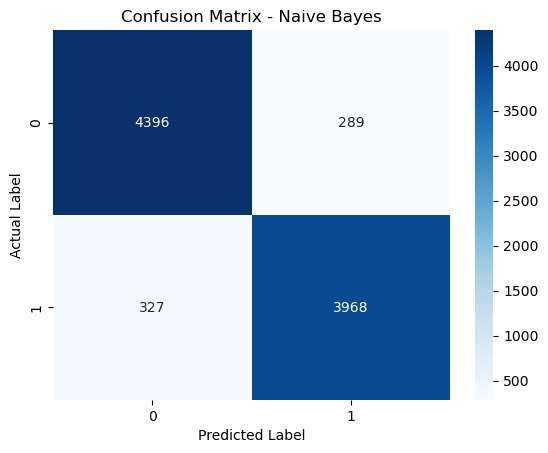

In [47]:
sns.heatmap(
    confusion_matrix(y_test, nb_predictions),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

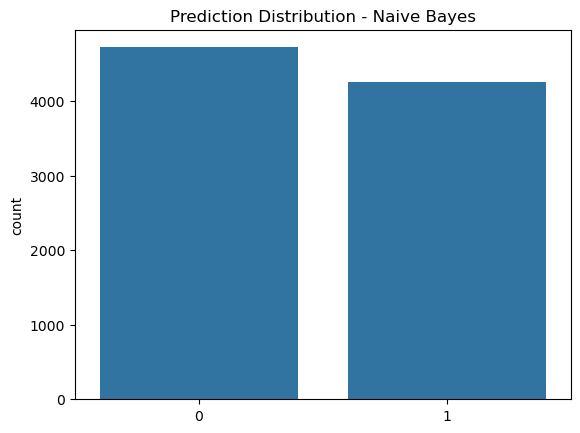

In [48]:
sns.countplot(x=nb_predictions)
plt.title("Prediction Distribution - Naive Bayes")
plt.show()

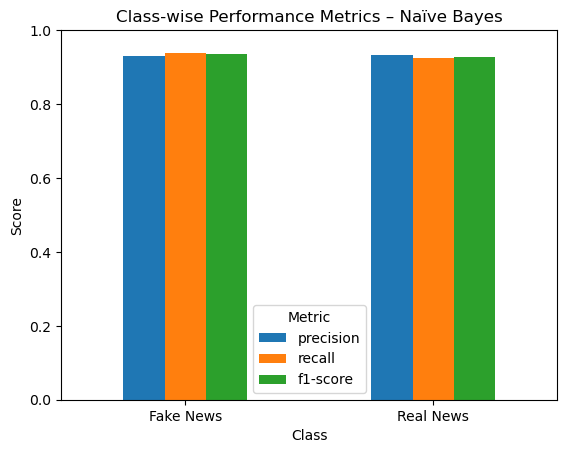

In [49]:
report_nb = classification_report(
    y_test,
    nb_predictions,
    target_names=["Fake News", "Real News"],
    output_dict=True
)

# Convert to DataFrame and select metrics
metrics_df = pd.DataFrame(report_nb).transpose()
metrics_df = metrics_df.loc[["Fake News", "Real News"], ["precision", "recall", "f1-score"]]

# Plot
metrics_df.plot(kind="bar")
plt.title("Class-wise Performance Metrics – Naïve Bayes")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()

In [50]:
# Training predictions and accuracy
nb_train_pred = nb_model.predict(X_train)
nb_train_acc = accuracy_score(y_train, nb_train_pred)

# Testing predictions and accuracy
nb_test_pred = nb_model.predict(X_test)
nb_test_acc = accuracy_score(y_test, nb_test_pred)

# Accuracy gap
accuracy_gap = abs(nb_train_acc - nb_test_acc)

# Print results
print("Naive Bayes Train Accuracy:", nb_train_acc)
print("Naive Bayes Test Accuracy :", nb_test_acc)
print("Accuracy Gap:", accuracy_gap)

# Interpretation
if accuracy_gap < 0.03:
    print("Conclusion: Naïve Bayes shows good generalization (no overfitting or underfitting).")
elif nb_train_acc > nb_test_acc:
    print("Conclusion: Naïve Bayes may be overfitting.")
else:
    print("Conclusion: Naïve Bayes may be underfitting.")

Naive Bayes Train Accuracy: 0.9429533938415279
Naive Bayes Test Accuracy : 0.9314031180400891
Accuracy Gap: 0.011550275801438747
Conclusion: Naïve Bayes shows good generalization (no overfitting or underfitting).


## KNN (K-Nearest Neighbors)

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.6410913140311804
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      4685
           1       0.96      0.26      0.41      4295

    accuracy                           0.64      8980
   macro avg       0.78      0.63      0.58      8980
weighted avg       0.77      0.64      0.58      8980



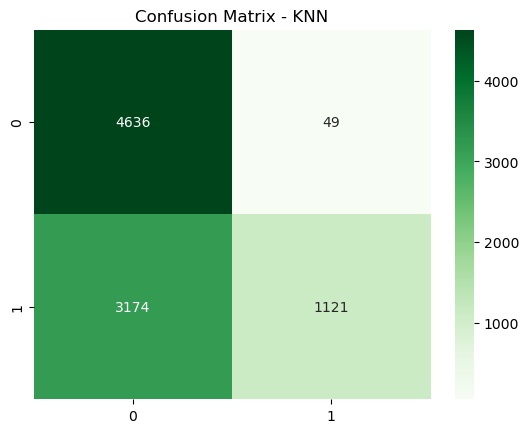

In [52]:
sns.heatmap(
    confusion_matrix(y_test, knn_predictions),
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Confusion Matrix - KNN")
plt.show()

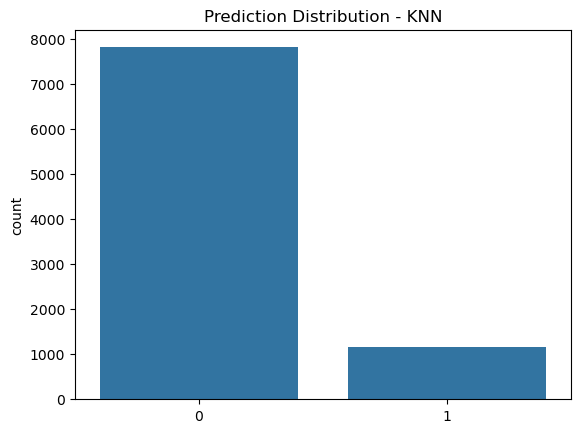

In [53]:
sns.countplot(x=knn_predictions)
plt.title("Prediction Distribution - KNN")
plt.show()

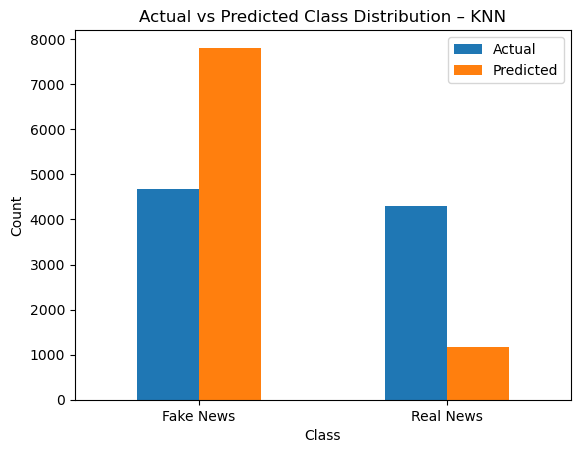

In [54]:
actual_counts = pd.Series(y_test).map({0: "Fake News", 1: "Real News"}).value_counts()
predicted_counts = pd.Series(knn_predictions).map({0: "Fake News", 1: "Real News"}).value_counts()

comparison_df = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": predicted_counts
})

comparison_df.plot(kind="bar")
plt.title("Actual vs Predicted Class Distribution – KNN")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [55]:
# Training predictions and accuracy
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)

# Testing predictions and accuracy
knn_test_pred = knn_model.predict(X_test)
knn_test_acc = accuracy_score(y_test, knn_test_pred)

# Accuracy gap
accuracy_gap_knn = abs(knn_train_acc - knn_test_acc)

# Print results
print("KNN Train Accuracy:", knn_train_acc)
print("KNN Test Accuracy :", knn_test_acc)
print("Accuracy Gap:", accuracy_gap_knn)

# Interpretation
if accuracy_gap_knn < 0.03:
    print("Conclusion: KNN shows good generalization.")
elif knn_train_acc > knn_test_acc:
    print("Conclusion: KNN may be overfitting.")
else:
    print("Conclusion: KNN may be underfitting.")

KNN Train Accuracy: 0.6817751545186258
KNN Test Accuracy : 0.6410913140311804
Accuracy Gap: 0.040683840487445444
Conclusion: KNN may be overfitting.


## Support Vector Machine (SVM)

In [56]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9928730512249443
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4685
           1       0.99      0.99      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



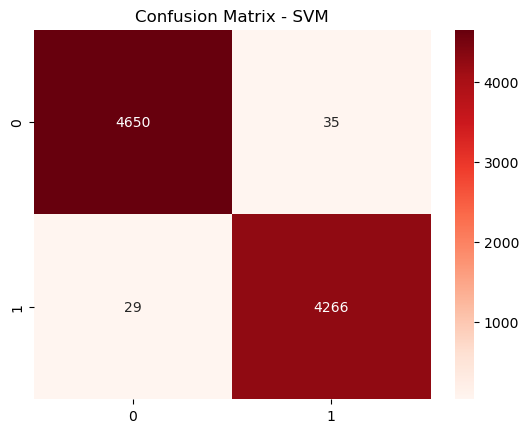

In [57]:
sns.heatmap(
    confusion_matrix(y_test, svm_predictions),
    annot=True,
    fmt="d",
    cmap="Reds"
)
plt.title("Confusion Matrix - SVM")
plt.show()

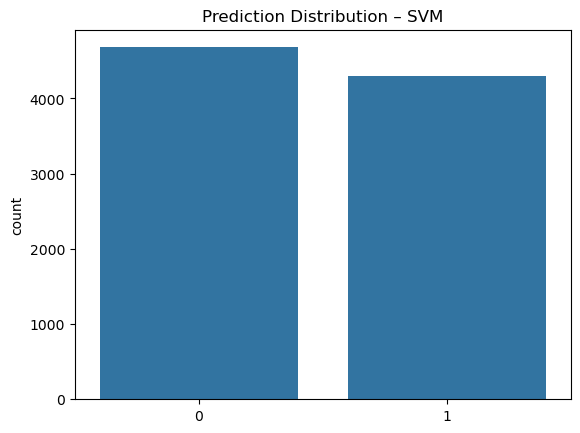

In [58]:
sns.countplot(x=svm_predictions)
plt.title("Prediction Distribution – SVM")
plt.show()

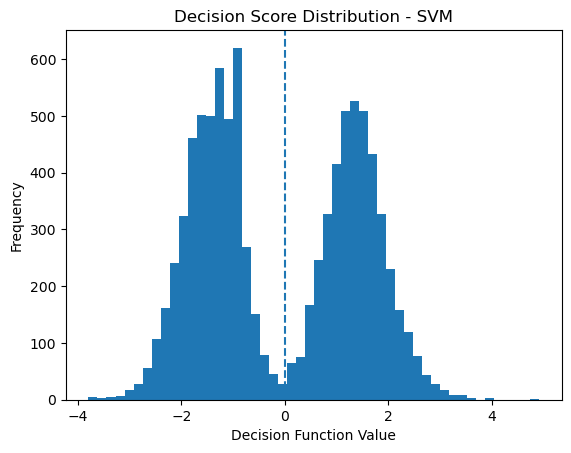

In [59]:
decision_scores = svm_model.decision_function(X_test)

plt.hist(decision_scores, bins=50)
plt.axvline(0, linestyle="--")
plt.title("Decision Score Distribution - SVM")
plt.xlabel("Decision Function Value")
plt.ylabel("Frequency")
plt.show()

In [60]:
# Training predictions and accuracy
svm_train_pred = svm_model.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)

# Testing predictions and accuracy
svm_test_pred = svm_model.predict(X_test)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

# Accuracy gap
accuracy_gap_svm = abs(svm_train_acc - svm_test_acc)

# Print results
print("SVM Train Accuracy:", svm_train_acc)
print("SVM Test Accuracy :", svm_test_acc)
print("Accuracy Gap:", accuracy_gap_svm)

# Interpretation
if accuracy_gap_svm < 0.03:
    print("Conclusion: SVM shows good generalization (no overfitting or underfitting).")
elif svm_train_acc > svm_test_acc:
    print("Conclusion: SVM may be overfitting.")
else:
    print("Conclusion: SVM may be underfitting.")

SVM Train Accuracy: 0.9996102232863745
SVM Test Accuracy : 0.9928730512249443
Accuracy Gap: 0.006737172061430208
Conclusion: SVM shows good generalization (no overfitting or underfitting).


## Model Accuracy Comparision between Naive Bayes, KNN and SVM

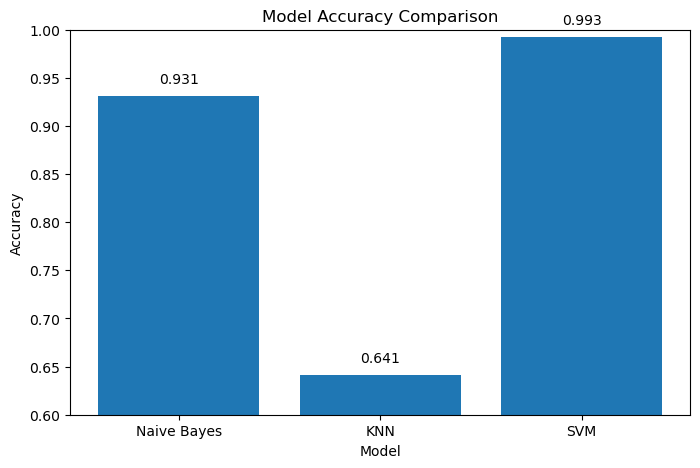

In [61]:
# Model names
models = ["Naive Bayes", "KNN", "SVM"]

# Accuracies
accuracies = [
    accuracy_score(y_test, nb_predictions),
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, svm_predictions)
]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies)

# Titles and labels
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# Set y-axis to show all models clearly
plt.ylim(0.6, 1.0)

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom"
    )

plt.show()

In [62]:
def predict_news(news_text):
    cleaned_text = clean_text(news_text)
    vectorized_text = tfidf.transform([cleaned_text])
    prediction = svm_model.predict(vectorized_text)
    return "Real News" if prediction[0] == 1 else "Fake News"

In [63]:
sample_news = "The government announced new economic policies today."
print("Prediction:", predict_news(sample_news))

Prediction: Fake News


## 3. Observations

- <strong>Support Vector Machine (SVM)</strong> achieved the highest accuracy among all evaluated models.  
- <strong>Naïve Bayes</strong> performed well but relies on the assumption of feature independence, which may not always hold for textual data.  
- <strong>K-Nearest Neighbours (KNN)</strong> was less efficient for high-dimensional and sparse text features such as TF-IDF vectors.  

Overall, this project demonstrates the effectiveness of combining 
<strong>Natural Language Processing (NLP)</strong> techniques with 
<strong>supervised machine learning algorithms</strong> for reliable fake news detection.